In [ ]:
import pandas as pd

In [ ]:
df  = pd.read_csv("/content/iris.csv")

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
df["species"].count()

150

In [ ]:
df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df["species"]

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [ ]:
flower_mapping = {"setosa":0,"versicolor":1,"virginica":2}
df["species"] = df["species"].map(flower_mapping)

In [ ]:
df["species"].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
X = df[["sepal_length","sepal_width","petal_length","petal_width"]].values
y = df[["species"]].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state =0)

In [ ]:
y_test.shape

(45, 1)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_fscore_support

In [ ]:
clf = SVC().fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm_df =pd.DataFrame(cm,
                    index =["setosa","versicolor","virginica"],
                    columns =["setosa","versicolor","virginica"] )

In [ ]:
cm_df

,setosa,versicolor,virginica
setosa,16,0,0
versicolor,0,17,1
virginica,0,0,11


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

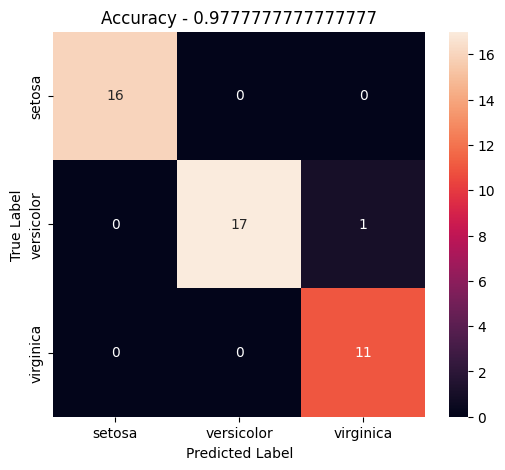

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,annot=True)
a=accuracy_score(y_test,y_pred)
plt.title("Accuracy - {}".format(a))
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = LogisticRegression().fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
lr_score = accuracy_score(y_test,y_pred)

In [ ]:
lr_score

0.9777777777777777

In [ ]:
dt_clf = DecisionTreeClassifier().fit(x_train,y_train)

In [ ]:
dt_pred = dt_clf.predict(x_test)

In [ ]:
dt_score = accuracy_score(y_test, dt_pred)

In [ ]:
dt_score

0.9777777777777777

In [ ]:
#for loop içinde tüm modeller.OK
# cf görsel kısmı bir fonksioyon
# dicte modellerin doğruluk oranlı karşılacak
# doğruluk oranlarını görselleştirelim.OK

LR Accuracy: 0.9777777777777777


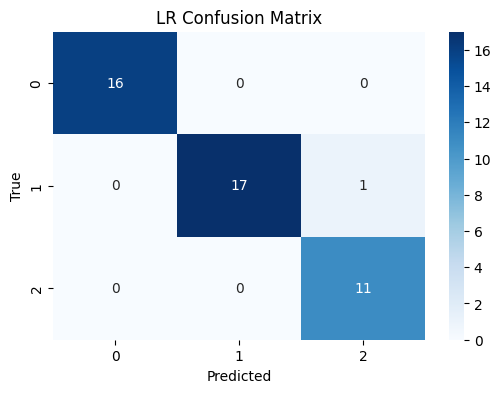

RFC Accuracy: 0.9777777777777777


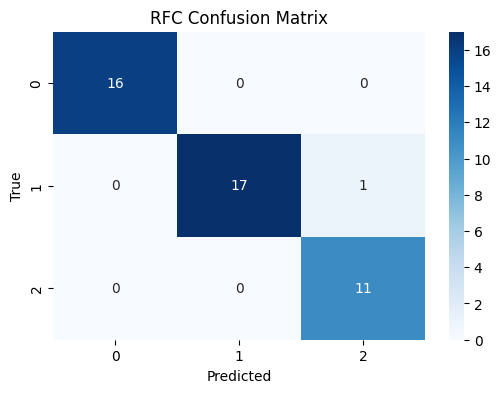

KNN Accuracy: 0.9777777777777777


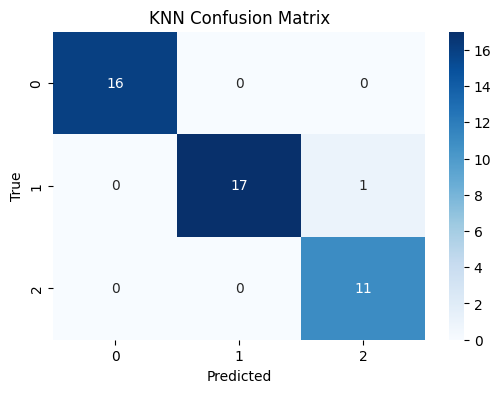

DTC Accuracy: 0.9777777777777777


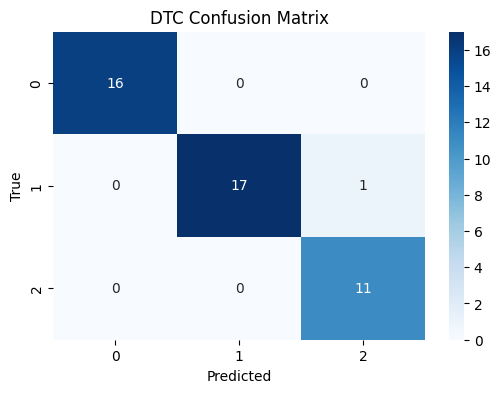

SVM Accuracy: 0.9777777777777777


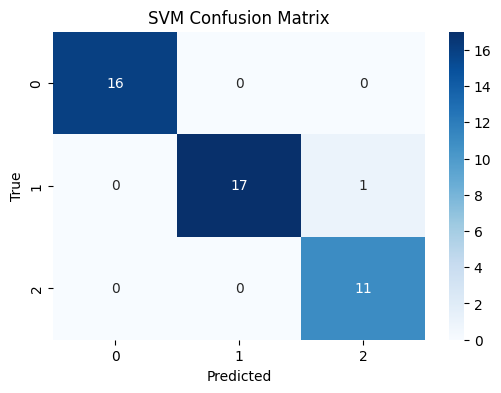

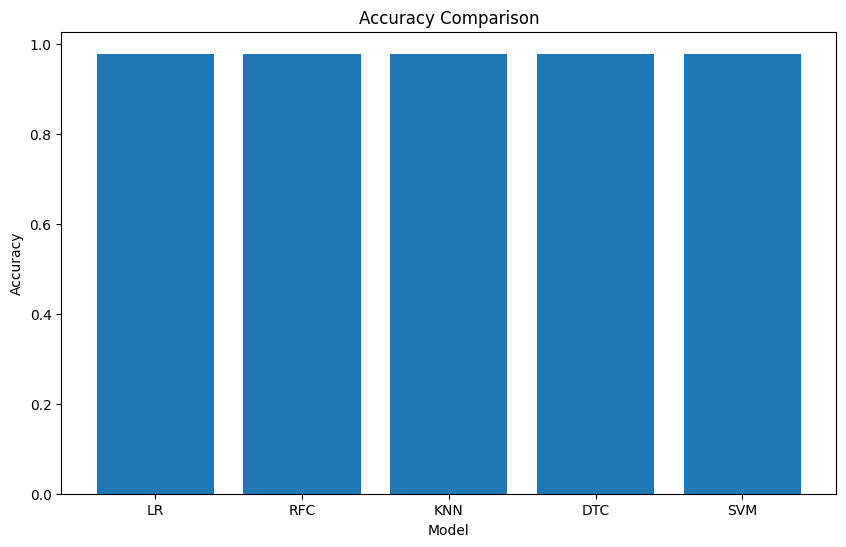

In [ ]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns

# Assume x_train, x_test, y_train, y_test are already defined and initialized

warnings.filterwarnings('ignore')

# Define models
models = []
models.append(('LR', LogisticRegression()))
models.append(('RFC', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

results = []
names = []
conf_matrices = {}
result_dict = {}

scoring = 'accuracy'


def conf_matrix_plot(y_test, predicted, conf_matrix):
    all_classes = np.unique(np.concatenate((y_test.ravel(), predicted)))
    df_cm = pd.DataFrame(conf_matrix)
    plt.figure(figsize=(6, 4))
    plt.title(f"{name} Confusion Matrix")
    sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


# For loop to train and evaluate all models
for name, model in models:
    model.fit(x_train, y_train)
    predicted = model.predict(x_test)

    accuracy = accuracy_score(y_test, predicted)
    conf_matrix = confusion_matrix(y_test, predicted)


    results.append(accuracy)
    names.append(name)
    conf_matrices[name] = conf_matrix
    result_dict[name + " Accuracy"] = accuracy

    print(f"{name} Accuracy: {accuracy}")

    conf_matrix_plot(y_test, predicted, conf_matrix)



plt.figure(figsize=(10, 6))
plt.bar(names, results)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()